In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/sarot/anaconda3/envs/py3tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
MY_BOUNDED_SET = 4

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 10000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [3]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [4]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [5]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(4, 3) (4, 3) (0, 3) (0, 3)


In [6]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []
pred_list = []

In [7]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [8]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       [0.082776 , 0.740335 , 0.365109 ]], dtype=float32)

In [9]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [10]:
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_3/BiasAdd:0' shape=(4, 3) dtype=float32>

In [11]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(cost)

In [12]:
session.run(tf.global_variables_initializer())

In [13]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [14]:
print (y_true.shape)

(?, 3)


In [15]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    global pred_list
    #global pred1,pred2,pred3
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true:X_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]
        pred_list += [session.run(output_layer,feed_dict=feed_dict_train)]

In [16]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [17]:
train(N_EPOCHS)
#predict()
output_layer

[1]
Train Accuracy :  0.595358
[2]
Train Accuracy :  0.5952579
[3]
Train Accuracy :  0.59515774
[4]
Train Accuracy :  0.5950576
[5]
Train Accuracy :  0.59495753
[6]
Train Accuracy :  0.5948574
[7]
Train Accuracy :  0.5947574
[8]
Train Accuracy :  0.5946573
[9]
Train Accuracy :  0.5945572
[10]
Train Accuracy :  0.5944572
[11]
Train Accuracy :  0.59435725
[12]
Train Accuracy :  0.59425724
[13]
Train Accuracy :  0.5941573
[14]
Train Accuracy :  0.5940573
[15]
Train Accuracy :  0.59395736
[16]
Train Accuracy :  0.5938574
[17]
Train Accuracy :  0.5937575
[18]
Train Accuracy :  0.5936576
[19]
Train Accuracy :  0.5935577
[20]
Train Accuracy :  0.5934578
[21]
Train Accuracy :  0.593358
[22]
Train Accuracy :  0.59325814
[23]
Train Accuracy :  0.5931583
[24]
Train Accuracy :  0.59305847
[25]
Train Accuracy :  0.5929586
[26]
Train Accuracy :  0.59285885
[27]
Train Accuracy :  0.5927591
[28]
Train Accuracy :  0.59265935
[29]
Train Accuracy :  0.5925596
[30]
Train Accuracy :  0.59245986
[31]
Train 

[376]
Train Accuracy :  0.558838
[377]
Train Accuracy :  0.55874324
[378]
Train Accuracy :  0.55864865
[379]
Train Accuracy :  0.55855393
[380]
Train Accuracy :  0.5584593
[381]
Train Accuracy :  0.5583646
[382]
Train Accuracy :  0.55827
[383]
Train Accuracy :  0.5581753
[384]
Train Accuracy :  0.5580808
[385]
Train Accuracy :  0.55798614
[386]
Train Accuracy :  0.5578916
[387]
Train Accuracy :  0.557797
[388]
Train Accuracy :  0.5577025
[389]
Train Accuracy :  0.5576079
[390]
Train Accuracy :  0.5575134
[391]
Train Accuracy :  0.5574189
[392]
Train Accuracy :  0.5573244
[393]
Train Accuracy :  0.55722994
[394]
Train Accuracy :  0.55713546
[395]
Train Accuracy :  0.557041
[396]
Train Accuracy :  0.5569466
[397]
Train Accuracy :  0.5568521
[398]
Train Accuracy :  0.55675775
[399]
Train Accuracy :  0.55666333
[400]
Train Accuracy :  0.5565689
[401]
Train Accuracy :  0.55647457
[402]
Train Accuracy :  0.55638015
[403]
Train Accuracy :  0.55628586
[404]
Train Accuracy :  0.5561915
[405]
Tr

[768]
Train Accuracy :  0.52270377
[769]
Train Accuracy :  0.522614
[770]
Train Accuracy :  0.52252424
[771]
Train Accuracy :  0.5224344
[772]
Train Accuracy :  0.5223447
[773]
Train Accuracy :  0.52225494
[774]
Train Accuracy :  0.5221652
[775]
Train Accuracy :  0.5220755
[776]
Train Accuracy :  0.52198577
[777]
Train Accuracy :  0.52189606
[778]
Train Accuracy :  0.52180636
[779]
Train Accuracy :  0.52171665
[780]
Train Accuracy :  0.521627
[781]
Train Accuracy :  0.52153736
[782]
Train Accuracy :  0.5214477
[783]
Train Accuracy :  0.5213581
[784]
Train Accuracy :  0.5212685
[785]
Train Accuracy :  0.52117884
[786]
Train Accuracy :  0.52108926
[787]
Train Accuracy :  0.52099967
[788]
Train Accuracy :  0.52091014
[789]
Train Accuracy :  0.52082056
[790]
Train Accuracy :  0.52073103
[791]
Train Accuracy :  0.52064145
[792]
Train Accuracy :  0.520552
[793]
Train Accuracy :  0.52046245
[794]
Train Accuracy :  0.5203729
[795]
Train Accuracy :  0.52028346
[796]
Train Accuracy :  0.520194
[

[1185]
Train Accuracy :  0.48735356
[1186]
Train Accuracy :  0.4872728
[1187]
Train Accuracy :  0.48719198
[1188]
Train Accuracy :  0.48711124
[1189]
Train Accuracy :  0.48703045
[1190]
Train Accuracy :  0.48694974
[1191]
Train Accuracy :  0.486869
[1192]
Train Accuracy :  0.4867883
[1193]
Train Accuracy :  0.48670757
[1194]
Train Accuracy :  0.48662686
[1195]
Train Accuracy :  0.48654616
[1196]
Train Accuracy :  0.48646548
[1197]
Train Accuracy :  0.48638478
[1198]
Train Accuracy :  0.48630413
[1199]
Train Accuracy :  0.4862235
[1200]
Train Accuracy :  0.48614284
[1201]
Train Accuracy :  0.48606217
[1202]
Train Accuracy :  0.48598152
[1203]
Train Accuracy :  0.4859009
[1204]
Train Accuracy :  0.4858203
[1205]
Train Accuracy :  0.48573968
[1206]
Train Accuracy :  0.4856591
[1207]
Train Accuracy :  0.4855785
[1208]
Train Accuracy :  0.48549792
[1209]
Train Accuracy :  0.48541737
[1210]
Train Accuracy :  0.4853368
[1211]
Train Accuracy :  0.48525625
[1212]
Train Accuracy :  0.48517573
[1

[1603]
Train Accuracy :  0.45427218
[1604]
Train Accuracy :  0.4541945
[1605]
Train Accuracy :  0.45411676
[1606]
Train Accuracy :  0.45403907
[1607]
Train Accuracy :  0.4539614
[1608]
Train Accuracy :  0.4538837
[1609]
Train Accuracy :  0.453806
[1610]
Train Accuracy :  0.45372832
[1611]
Train Accuracy :  0.45365065
[1612]
Train Accuracy :  0.45357302
[1613]
Train Accuracy :  0.45349532
[1614]
Train Accuracy :  0.45341766
[1615]
Train Accuracy :  0.45334002
[1616]
Train Accuracy :  0.4532624
[1617]
Train Accuracy :  0.45318472
[1618]
Train Accuracy :  0.4531071
[1619]
Train Accuracy :  0.45302945
[1620]
Train Accuracy :  0.45295277
[1621]
Train Accuracy :  0.4528743
[1622]
Train Accuracy :  0.45279676
[1623]
Train Accuracy :  0.45271927
[1624]
Train Accuracy :  0.45264173
[1625]
Train Accuracy :  0.4525642
[1626]
Train Accuracy :  0.45248666
[1627]
Train Accuracy :  0.45240915
[1628]
Train Accuracy :  0.45233163
[1629]
Train Accuracy :  0.4522541
[1630]
Train Accuracy :  0.45217657
[1

[2025]
Train Accuracy :  0.42343503
[2026]
Train Accuracy :  0.42336616
[2027]
Train Accuracy :  0.4232971
[2028]
Train Accuracy :  0.4232281
[2029]
Train Accuracy :  0.4231593
[2030]
Train Accuracy :  0.42309028
[2031]
Train Accuracy :  0.42302126
[2032]
Train Accuracy :  0.42295262
[2033]
Train Accuracy :  0.42288342
[2034]
Train Accuracy :  0.42281482
[2035]
Train Accuracy :  0.42274612
[2036]
Train Accuracy :  0.4226771
[2037]
Train Accuracy :  0.42260778
[2038]
Train Accuracy :  0.4225391
[2039]
Train Accuracy :  0.42247033
[2040]
Train Accuracy :  0.42240083
[2041]
Train Accuracy :  0.4223325
[2042]
Train Accuracy :  0.422264
[2043]
Train Accuracy :  0.42219523
[2044]
Train Accuracy :  0.42212608
[2045]
Train Accuracy :  0.42205665
[2046]
Train Accuracy :  0.42198774
[2047]
Train Accuracy :  0.42191923
[2048]
Train Accuracy :  0.42185006
[2049]
Train Accuracy :  0.42178133
[2050]
Train Accuracy :  0.4217129
[2051]
Train Accuracy :  0.42164412
[2052]
Train Accuracy :  0.42157504
[

[2438]
Train Accuracy :  0.39559543
[2439]
Train Accuracy :  0.39553005
[2440]
Train Accuracy :  0.3954646
[2441]
Train Accuracy :  0.39539924
[2442]
Train Accuracy :  0.39533395
[2443]
Train Accuracy :  0.39526862
[2444]
Train Accuracy :  0.3952031
[2445]
Train Accuracy :  0.39513758
[2446]
Train Accuracy :  0.39507347
[2447]
Train Accuracy :  0.39500698
[2448]
Train Accuracy :  0.39494243
[2449]
Train Accuracy :  0.3948769
[2450]
Train Accuracy :  0.3948121
[2451]
Train Accuracy :  0.39474723
[2452]
Train Accuracy :  0.39468217
[2453]
Train Accuracy :  0.39461684
[2454]
Train Accuracy :  0.39455134
[2455]
Train Accuracy :  0.39448568
[2456]
Train Accuracy :  0.39442128
[2457]
Train Accuracy :  0.39435625
[2458]
Train Accuracy :  0.39429027
[2459]
Train Accuracy :  0.39422503
[2460]
Train Accuracy :  0.3941602
[2461]
Train Accuracy :  0.39409512
[2462]
Train Accuracy :  0.39402986
[2463]
Train Accuracy :  0.3939644
[2464]
Train Accuracy :  0.39389876
[2465]
Train Accuracy :  0.3938329

[2857]
Train Accuracy :  0.36993387
[2858]
Train Accuracy :  0.36987746
[2859]
Train Accuracy :  0.3698218
[2860]
Train Accuracy :  0.36976528
[2861]
Train Accuracy :  0.36970887
[2862]
Train Accuracy :  0.36965278
[2863]
Train Accuracy :  0.36959624
[2864]
Train Accuracy :  0.36954004
[2865]
Train Accuracy :  0.36948365
[2866]
Train Accuracy :  0.3694276
[2867]
Train Accuracy :  0.36937132
[2868]
Train Accuracy :  0.36931488
[2869]
Train Accuracy :  0.36925983
[2870]
Train Accuracy :  0.369203
[2871]
Train Accuracy :  0.36914685
[2872]
Train Accuracy :  0.36909097
[2873]
Train Accuracy :  0.3690347
[2874]
Train Accuracy :  0.36897808
[2875]
Train Accuracy :  0.36892176
[2876]
Train Accuracy :  0.36886612
[2877]
Train Accuracy :  0.36880976
[2878]
Train Accuracy :  0.36875296
[2879]
Train Accuracy :  0.36869708
[2880]
Train Accuracy :  0.36864084
[2881]
Train Accuracy :  0.3685846
[2882]
Train Accuracy :  0.3685285
[2883]
Train Accuracy :  0.36847207
[2884]
Train Accuracy :  0.36841598

[3269]
Train Accuracy :  0.34703237
[3270]
Train Accuracy :  0.34697697
[3271]
Train Accuracy :  0.34692135
[3272]
Train Accuracy :  0.34686592
[3273]
Train Accuracy :  0.34681085
[3274]
Train Accuracy :  0.3467555
[3275]
Train Accuracy :  0.3467006
[3276]
Train Accuracy :  0.34664547
[3277]
Train Accuracy :  0.34659016
[3278]
Train Accuracy :  0.34653488
[3279]
Train Accuracy :  0.34647942
[3280]
Train Accuracy :  0.34642422
[3281]
Train Accuracy :  0.34636918
[3282]
Train Accuracy :  0.346314
[3283]
Train Accuracy :  0.34625897
[3284]
Train Accuracy :  0.34620342
[3285]
Train Accuracy :  0.3461482
[3286]
Train Accuracy :  0.3460931
[3287]
Train Accuracy :  0.34603772
[3288]
Train Accuracy :  0.34598282
[3289]
Train Accuracy :  0.34592772
[3290]
Train Accuracy :  0.34587243
[3291]
Train Accuracy :  0.3458171
[3292]
Train Accuracy :  0.34576133
[3293]
Train Accuracy :  0.34570727
[3294]
Train Accuracy :  0.3456522
[3295]
Train Accuracy :  0.3455959
[3296]
Train Accuracy :  0.3455409
[3

[3690]
Train Accuracy :  0.32372674
[3691]
Train Accuracy :  0.32367095
[3692]
Train Accuracy :  0.32361507
[3693]
Train Accuracy :  0.32355928
[3694]
Train Accuracy :  0.32350364
[3695]
Train Accuracy :  0.3234476
[3696]
Train Accuracy :  0.323392
[3697]
Train Accuracy :  0.32333684
[3698]
Train Accuracy :  0.32328084
[3699]
Train Accuracy :  0.32322508
[3700]
Train Accuracy :  0.32316926
[3701]
Train Accuracy :  0.3231134
[3702]
Train Accuracy :  0.32305762
[3703]
Train Accuracy :  0.32300183
[3704]
Train Accuracy :  0.32294613
[3705]
Train Accuracy :  0.32289058
[3706]
Train Accuracy :  0.32283488
[3707]
Train Accuracy :  0.3227794
[3708]
Train Accuracy :  0.32272324
[3709]
Train Accuracy :  0.32266733
[3710]
Train Accuracy :  0.32261238
[3711]
Train Accuracy :  0.322556
[3712]
Train Accuracy :  0.3225004
[3713]
Train Accuracy :  0.32244498
[3714]
Train Accuracy :  0.32238933
[3715]
Train Accuracy :  0.32233354
[3716]
Train Accuracy :  0.32227802
[3717]
Train Accuracy :  0.32222173


[4114]
Train Accuracy :  0.29980585
[4115]
Train Accuracy :  0.2997486
[4116]
Train Accuracy :  0.29969144
[4117]
Train Accuracy :  0.29963413
[4118]
Train Accuracy :  0.29957673
[4119]
Train Accuracy :  0.2995192
[4120]
Train Accuracy :  0.2994627
[4121]
Train Accuracy :  0.29940462
[4122]
Train Accuracy :  0.29934743
[4123]
Train Accuracy :  0.2992903
[4124]
Train Accuracy :  0.2992331
[4125]
Train Accuracy :  0.29917574
[4126]
Train Accuracy :  0.2991184
[4127]
Train Accuracy :  0.2990609
[4128]
Train Accuracy :  0.29900333
[4129]
Train Accuracy :  0.2989458
[4130]
Train Accuracy :  0.29888868
[4131]
Train Accuracy :  0.29883114
[4132]
Train Accuracy :  0.29877394
[4133]
Train Accuracy :  0.2987167
[4134]
Train Accuracy :  0.2986593
[4135]
Train Accuracy :  0.2986018
[4136]
Train Accuracy :  0.29854447
[4137]
Train Accuracy :  0.2984868
[4138]
Train Accuracy :  0.2984293
[4139]
Train Accuracy :  0.29837236
[4140]
Train Accuracy :  0.29831457
[4141]
Train Accuracy :  0.29825726
[4142

[4537]
Train Accuracy :  0.2751219
[4538]
Train Accuracy :  0.2750624
[4539]
Train Accuracy :  0.2750028
[4540]
Train Accuracy :  0.2749434
[4541]
Train Accuracy :  0.27488416
[4542]
Train Accuracy :  0.27482444
[4543]
Train Accuracy :  0.27476504
[4544]
Train Accuracy :  0.27470553
[4545]
Train Accuracy :  0.27464592
[4546]
Train Accuracy :  0.27458626
[4547]
Train Accuracy :  0.274527
[4548]
Train Accuracy :  0.27446714
[4549]
Train Accuracy :  0.27440766
[4550]
Train Accuracy :  0.27434823
[4551]
Train Accuracy :  0.2742886
[4552]
Train Accuracy :  0.27422905
[4553]
Train Accuracy :  0.27416947
[4554]
Train Accuracy :  0.27410987
[4555]
Train Accuracy :  0.27405027
[4556]
Train Accuracy :  0.27399057
[4557]
Train Accuracy :  0.2739311
[4558]
Train Accuracy :  0.2738713
[4559]
Train Accuracy :  0.27381182
[4560]
Train Accuracy :  0.2737521
[4561]
Train Accuracy :  0.27369308
[4562]
Train Accuracy :  0.27363285
[4563]
Train Accuracy :  0.27357337
[4564]
Train Accuracy :  0.27351364
[4

[4952]
Train Accuracy :  0.24995144
[4953]
Train Accuracy :  0.24988922
[4954]
Train Accuracy :  0.24982756
[4955]
Train Accuracy :  0.2497658
[4956]
Train Accuracy :  0.249704
[4957]
Train Accuracy :  0.24964231
[4958]
Train Accuracy :  0.24958031
[4959]
Train Accuracy :  0.24951847
[4960]
Train Accuracy :  0.24945661
[4961]
Train Accuracy :  0.24939476
[4962]
Train Accuracy :  0.24933286
[4963]
Train Accuracy :  0.24927092
[4964]
Train Accuracy :  0.24920899
[4965]
Train Accuracy :  0.24914707
[4966]
Train Accuracy :  0.24908513
[4967]
Train Accuracy :  0.24902311
[4968]
Train Accuracy :  0.2489616
[4969]
Train Accuracy :  0.24889903
[4970]
Train Accuracy :  0.248837
[4971]
Train Accuracy :  0.24877614
[4972]
Train Accuracy :  0.24871328
[4973]
Train Accuracy :  0.24865152
[4974]
Train Accuracy :  0.24858968
[4975]
Train Accuracy :  0.24852775
[4976]
Train Accuracy :  0.24846572
[4977]
Train Accuracy :  0.24840361
[4978]
Train Accuracy :  0.24834162
[4979]
Train Accuracy :  0.2482795

[5376]
Train Accuracy :  0.22323585
[5377]
Train Accuracy :  0.22317195
[5378]
Train Accuracy :  0.22310753
[5379]
Train Accuracy :  0.2230433
[5380]
Train Accuracy :  0.2229792
[5381]
Train Accuracy :  0.2229154
[5382]
Train Accuracy :  0.22285105
[5383]
Train Accuracy :  0.22278698
[5384]
Train Accuracy :  0.22272283
[5385]
Train Accuracy :  0.22265863
[5386]
Train Accuracy :  0.22259447
[5387]
Train Accuracy :  0.2225301
[5388]
Train Accuracy :  0.22246581
[5389]
Train Accuracy :  0.22240146
[5390]
Train Accuracy :  0.22233702
[5391]
Train Accuracy :  0.22227278
[5392]
Train Accuracy :  0.22220872
[5393]
Train Accuracy :  0.22214447
[5394]
Train Accuracy :  0.22208022
[5395]
Train Accuracy :  0.22201617
[5396]
Train Accuracy :  0.221952
[5397]
Train Accuracy :  0.2218878
[5398]
Train Accuracy :  0.22182359
[5399]
Train Accuracy :  0.2217593
[5400]
Train Accuracy :  0.22169498
[5401]
Train Accuracy :  0.22163069
[5402]
Train Accuracy :  0.22156632
[5403]
Train Accuracy :  0.22150198


[5794]
Train Accuracy :  0.19596186
[5795]
Train Accuracy :  0.19589573
[5796]
Train Accuracy :  0.19582953
[5797]
Train Accuracy :  0.19576329
[5798]
Train Accuracy :  0.195697
[5799]
Train Accuracy :  0.19563092
[5800]
Train Accuracy :  0.19556439
[5801]
Train Accuracy :  0.19549805
[5802]
Train Accuracy :  0.1954317
[5803]
Train Accuracy :  0.1953653
[5804]
Train Accuracy :  0.1952991
[5805]
Train Accuracy :  0.1952325
[5806]
Train Accuracy :  0.19516613
[5807]
Train Accuracy :  0.19509968
[5808]
Train Accuracy :  0.19503368
[5809]
Train Accuracy :  0.19496699
[5810]
Train Accuracy :  0.19490065
[5811]
Train Accuracy :  0.1948345
[5812]
Train Accuracy :  0.19476816
[5813]
Train Accuracy :  0.19470179
[5814]
Train Accuracy :  0.19463545
[5815]
Train Accuracy :  0.19456911
[5816]
Train Accuracy :  0.19450279
[5817]
Train Accuracy :  0.1944364
[5818]
Train Accuracy :  0.19437
[5819]
Train Accuracy :  0.19430357
[5820]
Train Accuracy :  0.19423707
[5821]
Train Accuracy :  0.19417056
[58

[6213]
Train Accuracy :  0.1677779
[6214]
Train Accuracy :  0.16770945
[6215]
Train Accuracy :  0.1676414
[6216]
Train Accuracy :  0.1675733
[6217]
Train Accuracy :  0.16750519
[6218]
Train Accuracy :  0.167437
[6219]
Train Accuracy :  0.1673688
[6220]
Train Accuracy :  0.16730055
[6221]
Train Accuracy :  0.16723228
[6222]
Train Accuracy :  0.1671642
[6223]
Train Accuracy :  0.16709575
[6224]
Train Accuracy :  0.16702762
[6225]
Train Accuracy :  0.16695927
[6226]
Train Accuracy :  0.16689101
[6227]
Train Accuracy :  0.16682269
[6228]
Train Accuracy :  0.1667544
[6229]
Train Accuracy :  0.16668603
[6230]
Train Accuracy :  0.16661766
[6231]
Train Accuracy :  0.16655006
[6232]
Train Accuracy :  0.16648108
[6233]
Train Accuracy :  0.16641289
[6234]
Train Accuracy :  0.16634464
[6235]
Train Accuracy :  0.16627647
[6236]
Train Accuracy :  0.1662082
[6237]
Train Accuracy :  0.16614018
[6238]
Train Accuracy :  0.16607183
[6239]
Train Accuracy :  0.1660036
[6240]
Train Accuracy :  0.16593531
[6

[6636]
Train Accuracy :  0.13858178
[6637]
Train Accuracy :  0.13851157
[6638]
Train Accuracy :  0.13844186
[6639]
Train Accuracy :  0.13837211
[6640]
Train Accuracy :  0.13830237
[6641]
Train Accuracy :  0.13823259
[6642]
Train Accuracy :  0.13816279
[6643]
Train Accuracy :  0.13809294
[6644]
Train Accuracy :  0.13802311
[6645]
Train Accuracy :  0.13795322
[6646]
Train Accuracy :  0.13788335
[6647]
Train Accuracy :  0.13781375
[6648]
Train Accuracy :  0.13774367
[6649]
Train Accuracy :  0.13767387
[6650]
Train Accuracy :  0.13760406
[6651]
Train Accuracy :  0.1375342
[6652]
Train Accuracy :  0.13746433
[6653]
Train Accuracy :  0.13739446
[6654]
Train Accuracy :  0.13732475
[6655]
Train Accuracy :  0.13725471
[6656]
Train Accuracy :  0.13718489
[6657]
Train Accuracy :  0.13711505
[6658]
Train Accuracy :  0.13704516
[6659]
Train Accuracy :  0.13697526
[6660]
Train Accuracy :  0.13690534
[6661]
Train Accuracy :  0.13683541
[6662]
Train Accuracy :  0.13676573
[6663]
Train Accuracy :  0.13

[7049]
Train Accuracy :  0.10949149
[7050]
Train Accuracy :  0.1094204
[7051]
Train Accuracy :  0.10934926
[7052]
Train Accuracy :  0.10927867
[7053]
Train Accuracy :  0.109207146
[7054]
Train Accuracy :  0.10913613
[7055]
Train Accuracy :  0.10906507
[7056]
Train Accuracy :  0.108994015
[7057]
Train Accuracy :  0.10892295
[7058]
Train Accuracy :  0.10885188
[7059]
Train Accuracy :  0.108780764
[7060]
Train Accuracy :  0.108709686
[7061]
Train Accuracy :  0.10863857
[7062]
Train Accuracy :  0.10856746
[7063]
Train Accuracy :  0.10849632
[7064]
Train Accuracy :  0.10842519
[7065]
Train Accuracy :  0.10835506
[7066]
Train Accuracy :  0.10828306
[7067]
Train Accuracy :  0.10821205
[7068]
Train Accuracy :  0.10814105
[7069]
Train Accuracy :  0.10806997
[7070]
Train Accuracy :  0.107998945
[7071]
Train Accuracy :  0.10792784
[7072]
Train Accuracy :  0.107856736
[7073]
Train Accuracy :  0.10778563
[7074]
Train Accuracy :  0.107714824
[7075]
Train Accuracy :  0.1076435
[7076]
Train Accuracy :

[7459]
Train Accuracy :  0.080163814
[7460]
Train Accuracy :  0.08009183
[7461]
Train Accuracy :  0.08001981
[7462]
Train Accuracy :  0.079947904
[7463]
Train Accuracy :  0.079875834
[7464]
Train Accuracy :  0.07980393
[7465]
Train Accuracy :  0.079731934
[7466]
Train Accuracy :  0.07966003
[7467]
Train Accuracy :  0.07958806
[7468]
Train Accuracy :  0.079516165
[7469]
Train Accuracy :  0.07944412
[7470]
Train Accuracy :  0.07937215
[7471]
Train Accuracy :  0.079300165
[7472]
Train Accuracy :  0.07922816
[7473]
Train Accuracy :  0.07915615
[7474]
Train Accuracy :  0.07908416
[7475]
Train Accuracy :  0.07901211
[7476]
Train Accuracy :  0.07894005
[7477]
Train Accuracy :  0.07886803
[7478]
Train Accuracy :  0.078795984
[7479]
Train Accuracy :  0.07872396
[7480]
Train Accuracy :  0.07865189
[7481]
Train Accuracy :  0.07857984
[7482]
Train Accuracy :  0.07850777
[7483]
Train Accuracy :  0.07843577
[7484]
Train Accuracy :  0.07836367
[7485]
Train Accuracy :  0.0782916
[7486]
Train Accuracy 

[7877]
Train Accuracy :  0.04987845
[7878]
Train Accuracy :  0.049805537
[7879]
Train Accuracy :  0.04973252
[7880]
Train Accuracy :  0.049659576
[7881]
Train Accuracy :  0.049586587
[7882]
Train Accuracy :  0.049513616
[7883]
Train Accuracy :  0.04944067
[7884]
Train Accuracy :  0.0493677
[7885]
Train Accuracy :  0.049294733
[7886]
Train Accuracy :  0.04922175
[7887]
Train Accuracy :  0.04914874
[7888]
Train Accuracy :  0.04907579
[7889]
Train Accuracy :  0.049002744
[7890]
Train Accuracy :  0.048929777
[7891]
Train Accuracy :  0.04885677
[7892]
Train Accuracy :  0.048783768
[7893]
Train Accuracy :  0.048710752
[7894]
Train Accuracy :  0.048637718
[7895]
Train Accuracy :  0.04856471
[7896]
Train Accuracy :  0.04849172
[7897]
Train Accuracy :  0.048418663
[7898]
Train Accuracy :  0.048345663
[7899]
Train Accuracy :  0.048272647
[7900]
Train Accuracy :  0.048199624
[7901]
Train Accuracy :  0.048126977
[7902]
Train Accuracy :  0.048053592
[7903]
Train Accuracy :  0.04798058
[7904]
Train 

[8298]
Train Accuracy :  0.018891536
[8299]
Train Accuracy :  0.01881722
[8300]
Train Accuracy :  0.018742865
[8301]
Train Accuracy :  0.018668525
[8302]
Train Accuracy :  0.018594172
[8303]
Train Accuracy :  0.01851982
[8304]
Train Accuracy :  0.018445432
[8305]
Train Accuracy :  0.01837104
[8306]
Train Accuracy :  0.01829662
[8307]
Train Accuracy :  0.01822225
[8308]
Train Accuracy :  0.018147828
[8309]
Train Accuracy :  0.01807342
[8310]
Train Accuracy :  0.017999018
[8311]
Train Accuracy :  0.017924573
[8312]
Train Accuracy :  0.017850151
[8313]
Train Accuracy :  0.01777572
[8314]
Train Accuracy :  0.01770128
[8315]
Train Accuracy :  0.017626835
[8316]
Train Accuracy :  0.01755241
[8317]
Train Accuracy :  0.017477963
[8318]
Train Accuracy :  0.0174035
[8319]
Train Accuracy :  0.017329073
[8320]
Train Accuracy :  0.017254606
[8321]
Train Accuracy :  0.017180141
[8322]
Train Accuracy :  0.017105658
[8323]
Train Accuracy :  0.017031232
[8324]
Train Accuracy :  0.016956737
[8325]
Train

[8720]
Train Accuracy :  7.372892e-05
[8721]
Train Accuracy :  7.294988e-05
[8722]
Train Accuracy :  7.211256e-05
[8723]
Train Accuracy :  7.129903e-05
[8724]
Train Accuracy :  7.051143e-05
[8725]
Train Accuracy :  6.968769e-05
[8726]
Train Accuracy :  6.8887275e-05
[8727]
Train Accuracy :  6.8057816e-05
[8728]
Train Accuracy :  6.724779e-05
[8729]
Train Accuracy :  6.663381e-05
[8730]
Train Accuracy :  6.574984e-05
[8731]
Train Accuracy :  6.494155e-05
[8732]
Train Accuracy :  6.4158434e-05
[8733]
Train Accuracy :  6.3400155e-05
[8734]
Train Accuracy :  6.266637e-05
[8735]
Train Accuracy :  6.184673e-05
[8736]
Train Accuracy :  6.104618e-05
[8737]
Train Accuracy :  6.029448e-05
[8738]
Train Accuracy :  5.954698e-05
[8739]
Train Accuracy :  5.8749025e-05
[8740]
Train Accuracy :  5.7952733e-05
[8741]
Train Accuracy :  5.7206773e-05
[8742]
Train Accuracy :  5.641694e-05
[8743]
Train Accuracy :  5.567382e-05
[8744]
Train Accuracy :  5.492137e-05
[8745]
Train Accuracy :  5.41753e-05
[8746]

[8934]
Train Accuracy :  1.0150549e-05
[8935]
Train Accuracy :  1.0152409e-05
[8936]
Train Accuracy :  1.0096153e-05
[8937]
Train Accuracy :  1.0009163e-05
[8938]
Train Accuracy :  9.95039e-06
[8939]
Train Accuracy :  9.93613e-06
[8940]
Train Accuracy :  9.9450845e-06
[8941]
Train Accuracy :  9.985802e-06
[8942]
Train Accuracy :  9.98148e-06
[8943]
Train Accuracy :  9.943026e-06
[8944]
Train Accuracy :  9.885348e-06
[8945]
Train Accuracy :  9.842156e-06
[8946]
Train Accuracy :  9.817662e-06
[8947]
Train Accuracy :  9.8088085e-06
[8948]
Train Accuracy :  9.808622e-06
[8949]
Train Accuracy :  9.826411e-06
[8950]
Train Accuracy :  9.805055e-06
[8951]
Train Accuracy :  9.744646e-06
[8952]
Train Accuracy :  9.662588e-06
[8953]
Train Accuracy :  9.658078e-06
[8954]
Train Accuracy :  9.671407e-06
[8955]
Train Accuracy :  9.68663e-06
[8956]
Train Accuracy :  9.6853855e-06
[8957]
Train Accuracy :  9.674399e-06
[8958]
Train Accuracy :  9.62977e-06
[8959]
Train Accuracy :  9.59127e-06
[8960]
Trai

[9349]
Train Accuracy :  4.9058995e-06
[9350]
Train Accuracy :  4.802748e-06
[9351]
Train Accuracy :  4.950307e-06
[9352]
Train Accuracy :  4.8804327e-06
[9353]
Train Accuracy :  4.781606e-06
[9354]
Train Accuracy :  4.9325104e-06
[9355]
Train Accuracy :  4.8704014e-06
[9356]
Train Accuracy :  4.782506e-06
[9357]
Train Accuracy :  4.9052865e-06
[9358]
Train Accuracy :  4.83015e-06
[9359]
Train Accuracy :  4.783734e-06
[9360]
Train Accuracy :  4.9074492e-06
[9361]
Train Accuracy :  4.7473304e-06
[9362]
Train Accuracy :  4.8143233e-06
[9363]
Train Accuracy :  4.854859e-06
[9364]
Train Accuracy :  4.72314e-06
[9365]
Train Accuracy :  4.854131e-06
[9366]
Train Accuracy :  4.7865105e-06
[9367]
Train Accuracy :  4.7169815e-06
[9368]
Train Accuracy :  4.893539e-06
[9369]
Train Accuracy :  4.7211693e-06
[9370]
Train Accuracy :  4.7203225e-06
[9371]
Train Accuracy :  4.8789784e-06
[9372]
Train Accuracy :  4.6809564e-06
[9373]
Train Accuracy :  4.7425556e-06
[9374]
Train Accuracy :  4.80843e-06


[9773]
Train Accuracy :  3.7117616e-06
[9774]
Train Accuracy :  3.5583173e-06
[9775]
Train Accuracy :  3.6884826e-06
[9776]
Train Accuracy :  3.5965204e-06
[9777]
Train Accuracy :  3.6210959e-06
[9778]
Train Accuracy :  3.5883616e-06
[9779]
Train Accuracy :  3.6027454e-06
[9780]
Train Accuracy :  3.6387182e-06
[9781]
Train Accuracy :  3.6289975e-06
[9782]
Train Accuracy :  3.6514168e-06
[9783]
Train Accuracy :  3.6002843e-06
[9784]
Train Accuracy :  3.6349481e-06
[9785]
Train Accuracy :  3.5471323e-06
[9786]
Train Accuracy :  3.6495007e-06
[9787]
Train Accuracy :  3.5597288e-06
[9788]
Train Accuracy :  3.645285e-06
[9789]
Train Accuracy :  3.5455985e-06
[9790]
Train Accuracy :  3.6781817e-06
[9791]
Train Accuracy :  3.5386429e-06
[9792]
Train Accuracy :  3.6871154e-06
[9793]
Train Accuracy :  3.4923823e-06
[9794]
Train Accuracy :  3.680392e-06
[9795]
Train Accuracy :  3.4944587e-06
[9796]
Train Accuracy :  3.6839976e-06
[9797]
Train Accuracy :  3.5054868e-06
[9798]
Train Accuracy :  3.

<tf.Tensor 'dense_3/BiasAdd:0' shape=(4, 3) dtype=float32>

In [18]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [19]:
#print (session.run(output_layer))

In [20]:
#print (session.run(cost))

In [21]:
#print (rmse_a)

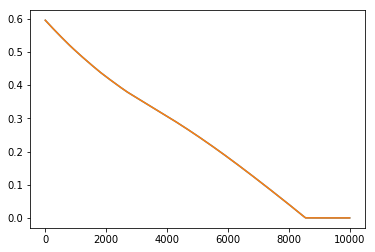

In [22]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [23]:
list(enumerate(range(10)))

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [24]:
print (rmse_a)

[0.595358, 0.5952579, 0.59515774, 0.5950576, 0.59495753, 0.5948574, 0.5947574, 0.5946573, 0.5945572, 0.5944572, 0.59435725, 0.59425724, 0.5941573, 0.5940573, 0.59395736, 0.5938574, 0.5937575, 0.5936576, 0.5935577, 0.5934578, 0.593358, 0.59325814, 0.5931583, 0.59305847, 0.5929586, 0.59285885, 0.5927591, 0.59265935, 0.5925596, 0.59245986, 0.5923601, 0.59226036, 0.5921607, 0.592061, 0.5919613, 0.59186167, 0.591762, 0.5916624, 0.5915628, 0.5914632, 0.5913636, 0.591264, 0.5911645, 0.59106493, 0.59096545, 0.5908659, 0.59076643, 0.59066695, 0.5905675, 0.59046805, 0.5903686, 0.5902692, 0.5901698, 0.59007037, 0.58997107, 0.5898717, 0.58977234, 0.58967304, 0.58957374, 0.58947444, 0.5893752, 0.5892759, 0.58917665, 0.5890774, 0.58897823, 0.588879, 0.5887798, 0.5886806, 0.5885815, 0.5884824, 0.58838326, 0.58828413, 0.5881851, 0.58808595, 0.5879869, 0.5878879, 0.5877888, 0.58768976, 0.58759075, 0.58749175, 0.5873928, 0.58729386, 0.5871949, 0.58709604, 0.5869971, 0.58689815, 0.58679926, 0.58670044, 0

In [25]:
print (rmse_a[-1])

3.3727067e-06


In [26]:
print (pred_list[-1])

[[0.08271048 0.7409786  0.36643815]
 [0.08273358 0.7407665  0.36599615]
 [0.08275687 0.74055445 0.36555013]
 [0.08277876 0.74033797 0.36510706]]
